In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 24.6 MB/s eta 0:00:00


In [3]:
%cd /content/drive/MyDrive/container_sign/Hazmat_Placards.v5i.yolov8
!yolo task=detect mode=train model=yolov8n.pt data= data.yaml epochs=50 imgsz=640 plots=True

/content/drive/MyDrive/container_sign/Hazmat_Placards.v5i.yolov8
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 6.25M/6.25M [00:00<00:00, 105MB/s]
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.

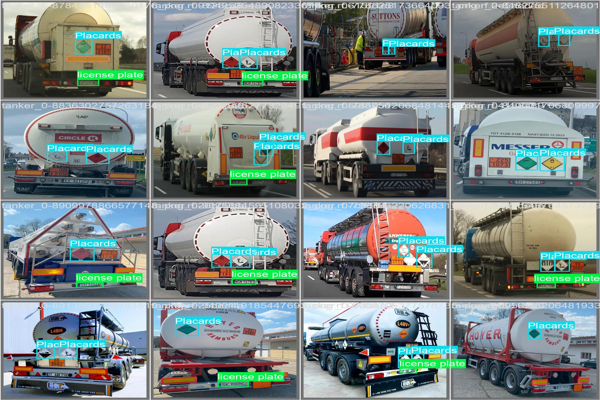

In [5]:
!pip install Pillow
from PIL import Image
from IPython.display import display

img = Image.open('/content/drive/MyDrive/container_sign/Hazmat_Placards.v5i.yolov8/runs/detect/train/val_batch0_labels.jpg')

img = img.resize((600, 400))
display(img)

In [6]:
%cd /content/drive/MyDrive/container_sign/Hazmat_Placards.v5i.yolov8


/content/drive/MyDrive/container_sign/Hazmat_Placards.v5i.yolov8


In [7]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/container_sign/Hazmat_Placards.v5i.yolov8/valid/labels.cache... 518 images, 8 backgrounds, 0 corrupt: 100% 518/518 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 85, len(boxes) = 985. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 33/33 [00:10<00:00,  3.17it/s]
                   all        518        985      0.931      0.929      0.959      0.802
           ERIrotation         20         33      0.905      0.869      0.959      0.847
              Placards         62        118      0.872      0.809      0.876      0.707
    

In [9]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/container_sign/Hazmat_Placards.v5i.yolov8/test/images

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs

image 1/263 /content/drive/MyDrive/container_sign/Hazmat_Placards.v5i.yolov8/test/images/01.rf.51b331a822cbf8463a5311d5aec10e21.jpg: 640x640 1 dangerous-when-wet, 1 explosive, 1 flammable, 1 oxidizer, 7.9ms
image 2/263 /content/drive/MyDrive/container_sign/Hazmat_Placards.v5i.yolov8/test/images/02_jpg.rf.4cb36207ca9a1649eeaf08fafd37c699.jpg: 640x640 1 flammable-solid, 7.5ms
image 3/263 /content/drive/MyDrive/container_sign/Hazmat_Placards.v5i.yolov8/test/images/04_jpg.rf.997e5fa826e5109c68caadced14e4686.jpg: 640x640 1 dangerous-when-wet, 14.8ms
image 4/263 /content/drive/MyDrive/container_sign/Hazmat_Placards.v5i.yolov8/test/images/12_jpg.rf.44636692aa2656348dc6ada5dc0bd5e6.jpg: 640x640 1 oxidizer, 2 poisons, 13.0ms
image 5/263 /content/drive/MyDrive/container_sign/Hazmat_Placards.v5i.yolov8/test/images/ALL-Black-Paper-01_pn